# Titanic - Machine Learning from Disaster

*The sinking of the Titanic is one of the most infamous shipwrecks in history.*<br>

*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*<br>

*While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.*<br>

*In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).*

#### 1.Data Exploration

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
df = pd.read_csv("train.csv", index_col="PassengerId")

display(df.head())

print("\033[1m The dataset consists of {} features and {} samples.\033[0m".format(df.shape[1], df.shape[0]))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 The dataset consists of 11 features and 891 samples.


*See the data type of all features of this dataset*

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


*See some information of the nemurical feature in dataset*

In [367]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2. Exploratory Data Analysis

In this dataset, the target feature is "Survived"

The rest of the features columns will be divided into 3 groups, every every sample is a person who was in this disaster :
- Physical attributes of that person: Sex, Age.
- Relationship and Number of their accompany.
- Attribution belongs to the trip: Fare, Embarked, Pclass

First, have a look at the relationship between those features and how they interact with each other

<Axes: xlabel='Age', ylabel='Count'>

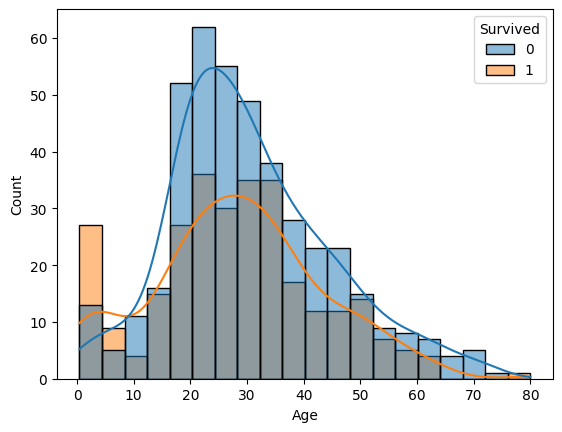

In [368]:
sns.histplot(data=df, x="Age", hue="Survived", kde=True)

*We can see clearly that at the age of less than 10, the rate of survival is much higher than at other ages. In contrast, the age of between 18 and 40, this survival rate is much lower*

<Axes: xlabel='Sex', ylabel='Age'>

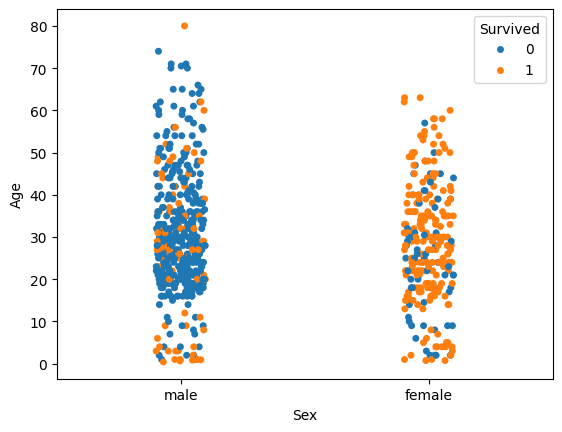

In [369]:
sns.stripplot(data=df, x="Sex", y="Age", hue="Survived")


*Looking closely, and following this trend with age, if we divide into 2 groups by Gender,  we can see the survival rate of Females is much more than Males across the Age*

Next, we will look at the attributions of the trip

<Axes: xlabel='Pclass', ylabel='Fare'>

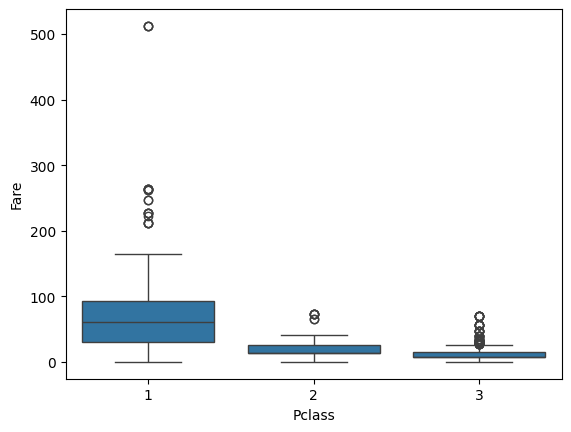

In [370]:
sns.boxplot(data=df, x="Pclass", y="Fare")

Price of tickets are different, Pclass 1 is higher than Pclass 2 and 3.
And how about the rate of survival in these Pclass

<Axes: xlabel='Pclass', ylabel='count'>

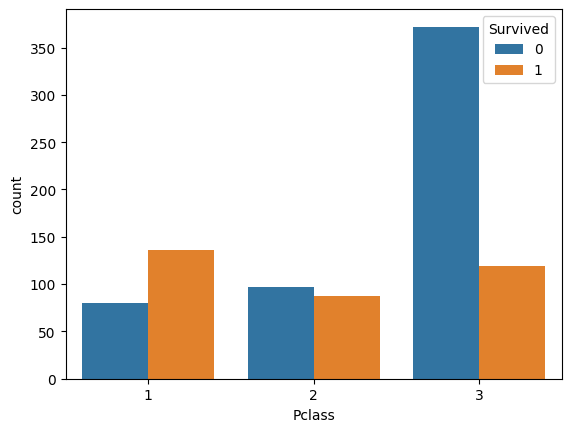

In [371]:
sns.countplot(data=df, x="Pclass", hue="Survived")

*People who are in Pclass 1 have a higher rate of survival, it decreases in Pclass 2, and in Pclass 3, this rate of survival is much lower*
We combine with Fare to see more inside

<Figure size 800x400 with 0 Axes>

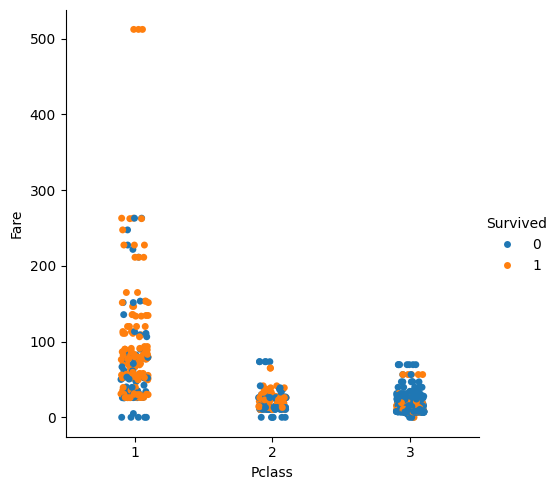

In [372]:
plt.figure(figsize=(8,4))

sns.catplot(data=df, x="Pclass", y="Fare", hue="Survived")

plt.show()

As mentioned above, Pclass 1 has the highest rate of survival and the higher Fare, the higher this rate is.
Similarly, the Embark is the same as Pclass, Embarked at C than Q and S

<Axes: xlabel='Embarked', ylabel='count'>

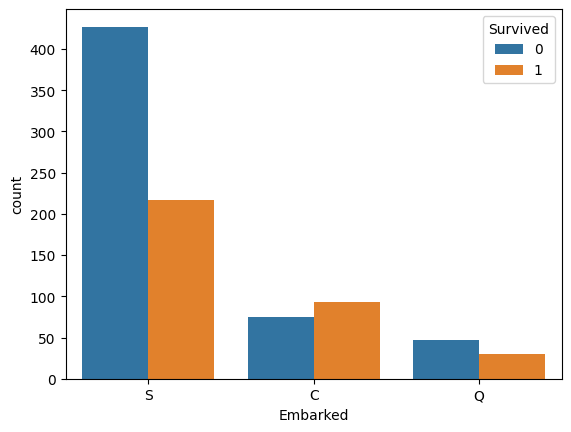

In [373]:
sns.countplot(data=df, x="Embarked", hue="Survived")

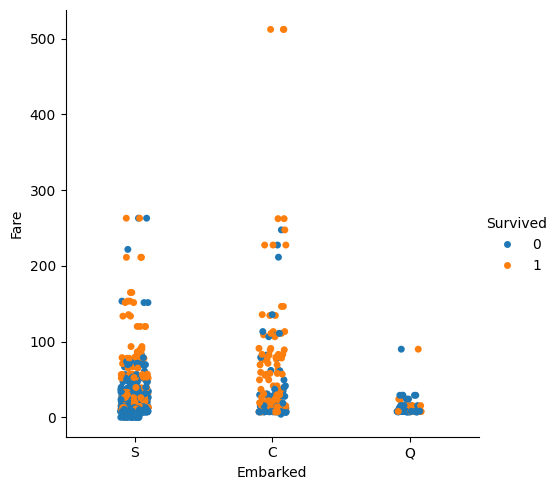

In [374]:
sns.catplot(data=df, x="Embarked", y="Fare", hue="Survived")

Lastly, consider accompany, we can the that if a person have Sibsp and Parch between 0 - 3. They have a higher rate of survival.

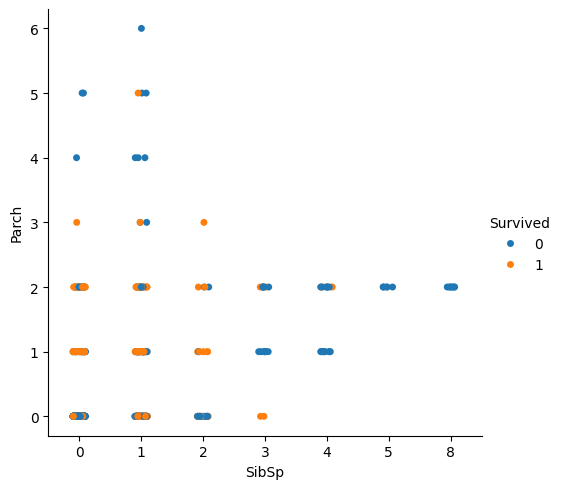

In [375]:
sns.catplot(data=df, x="SibSp",y="Parch", hue="Survived")

Have a look at the correlation between those features, the only noticeable relation in  this chart in between Age, Sibsp and Parch

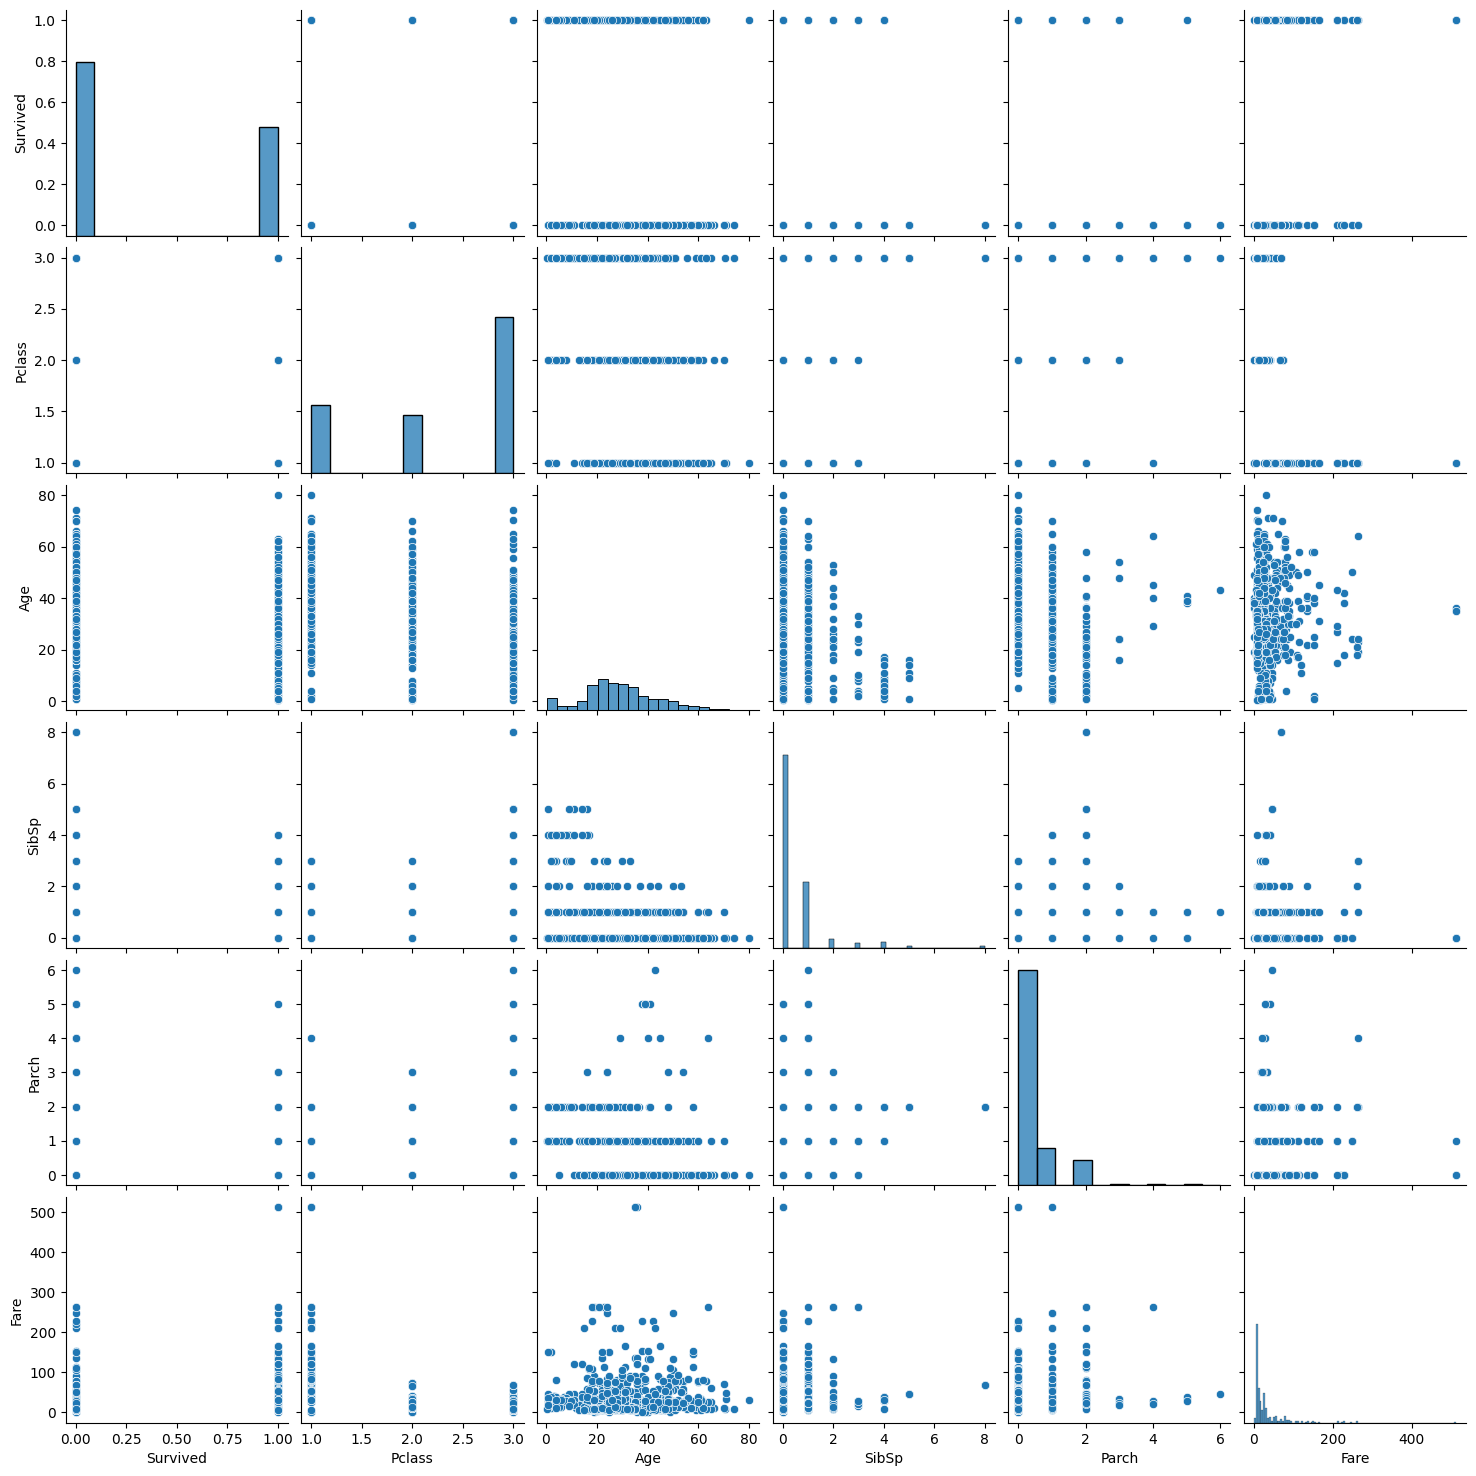

In [376]:
sns.pairplot(df.drop(columns=["Name", "Ticket"]))

#### 3. Preprocessing Data

In [377]:
total_null = df.isnull().sum()
percel_null = total_null / df.isnull().count()
pd.concat([total_null, percel_null], axis=1, keys=["Number of null", "Percent"])

,Number of null,Percent
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,687,0.771044


There are 177 missing values in the Age feature, we will fill in this NaN value with the mean belong to group of Gender, Pclass and Embarked

In [378]:
mean_age = df.groupby(["Sex","Pclass", "Embarked"],as_index=False)["Age"].mean()

In [379]:
# Fill null value in Age feature with everage age in group of their Gender, Pclass and Embarked  
for i in range(len(mean_age)):
    df.loc[(df["Sex"] == mean_age.values[i][0]) & (df["Pclass"] == mean_age.values[i][1]) & (df["Embarked"] == mean_age.values[i][2]),["Age"]] = df.loc[(df["Sex"] == mean_age.values[i][0]) & (df["Pclass"] == mean_age.values[i][1]) & (df["Embarked"] == mean_age.values[i][2]),["Age"]].fillna(mean_age.values[i][3])

Cabin feature miss 77% of value, so the best way is drop this columns

In [380]:
df.drop(columns="Cabin", inplace=True)

Fill 2 missing value in Embarked with the most occurrence value

In [381]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

I will drop columns Name and Ticket, they have no meaningful value for the model prediction

In [382]:
df.drop(columns=["Name","Ticket"], inplace=True)

In [383]:
X = df.copy()
y = X.pop("Survived")

I will get dummies columns Sex and Embarked. The Pclass is categorical features, but it is already in ordinal number so I will leave it intact

In [384]:
X_dum = pd.get_dummies(X, columns=["Sex", "Embarked"])

In [385]:
from sklearn.model_selection import train_test_split

In [386]:
train_x, test_x, train_y, test_y = train_test_split(X_dum,y, test_size=0.3, random_state=0)

#### 4.Model Prediction

In my personal experience, this model prediction is based on some features that are not influenced by physical, chemical, or biological rules. So I will choose Randomforest, KNN, and XgBoost for my model

In [387]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()

rf_model.fit(train_x, train_y)

rf_predict = rf_model.predict(test_x)

rf_score = accuracy_score(test_y, rf_predict)

print(rf_score)

0.8134328358208955


In [388]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(train_x, train_y)

knn_predict = knn_model.predict(test_x)

knn_score = accuracy_score(test_y, knn_predict)

print(knn_score)

0.7238805970149254


In [389]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(train_x, train_y)

xgb_predict = xgb_model.predict(test_x)

xgb_score = accuracy_score(test_y, xgb_predict)

print(xgb_score)

0.835820895522388


#### 4.Model Prediction

In [390]:
pd.DataFrame({"Accuracy scoure" : [rf_score, knn_score, xgb_score]}, index=["Random Forest", "KNearest Neighbor", "XGBoost"])

,Accuracy scoure
Random Forest,0.813433
KNearest Neighbor,0.723881
XGBoost,0.835821


The XGBooost seem to have the best of prediction score